Importing files for dataset and tables

In [ ]:
 #importing library

import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
#connecting to goole drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path of the drive

Path = 'drive/My Drive/Projects/Sem 6/ML/ML_DataSet'

In [ ]:
# ratings

ratings = pd.read_csv(Path+'/ratings_small.csv', encoding="utf-8-sig")
ratings


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
# movies

movies = pd.read_csv(Path+'/movies_metadata.csv', encoding="utf-8-sig")
movies = movies.rename(columns={'id': 'movieId'})
movies


<ipython-input-5-5a79498913a6>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(Path+'/movies_metadata.csv', encoding="utf-8-sig")


,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
# Removing the datawhich are not relavant
movies = movies.loc[movies['movieId'] != '1997-08-20']
movies = movies.loc[movies['movieId'] != '2012-09-29']
movies = movies.loc[movies['movieId'] != '2014-01-01']

# changing the datatype of movieId of Movies and its title
movies['movieId'] = movies['movieId'].astype(int)


<ipython-input-6-268d55082a4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['movieId'] = movies['movieId'].astype(int)


Prinit the number of unique users and movies & Data vizulization

In [ ]:
# Number of users

print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')

# Number of movies

print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')

# Number of ratings

print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings

print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 671 unique users
The ratings dataset has 9066 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [ ]:
# Merge ratings and movies datasets

df = pd.merge(ratings[['userId','movieId','rating']], movies[['movieId','title']], on='movieId')
df


,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III
...,...,...,...,...
44989,652,129009,4.0,Love Is a Ball
44990,653,2103,3.0,Solaris
44991,659,167,4.0,K-PAX
44992,659,563,3.0,Starship Troopers


In [ ]:
# Aggregate by movie

agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 10 ratings

agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 2791
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              891 non-null    object 
 1   mean_rating        891 non-null    float64
 2   number_of_ratings  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [ ]:
# Check popular movies

agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
1959,Terminator 3: Rise of the Machines,4.256173,324
2306,The Million Dollar Hotel,4.487138,311
1837,Solaris,4.134426,305
1967,The 39 Steps,4.221649,291
1374,Monsoon Wedding,3.706204,274


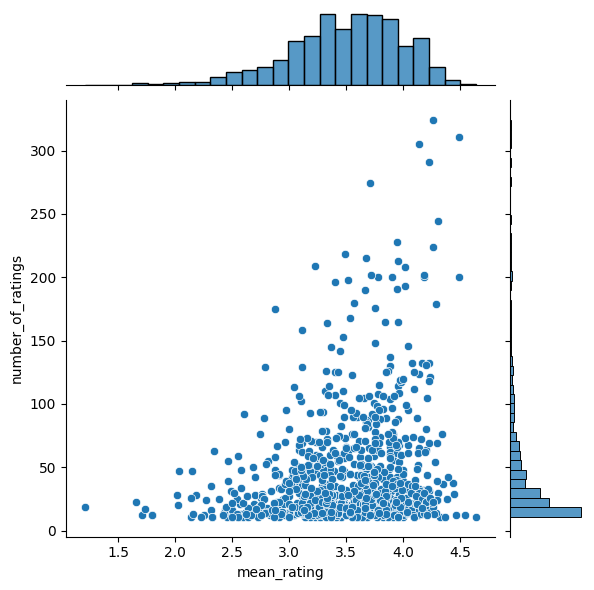

In [ ]:
# Visulization

sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [ ]:
# Merge data

df_GT100 = pd.merge(df, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39135 entries, 0 to 39134
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   39135 non-null  int64  
 1   movieId  39135 non-null  int64  
 2   rating   39135 non-null  float64
 3   title    39135 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


Test - Train Data split

In [ ]:
# Split the data into training and testing sets with an 80-20 split

train_data, test_data = train_test_split(df_GT100, test_size=0.3)

In [ ]:
len(train_data.index)

27394

In [ ]:
len(test_data.index)

11741

In [ ]:
# Number of users

print('The train ratings dataset has', train_data['userId'].nunique(), 'unique users')
print('The test ratings dataset has', test_data['userId'].nunique(), 'unique users')
print('The test ratings dataset has', df_GT100['userId'].nunique(), 'unique users')

# Number of movies

print('The train ratings dataset has', train_data['movieId'].nunique(), 'unique movies')
print('The test ratings dataset has', test_data['movieId'].nunique(), 'unique movies')

# Number of ratings

print('The train ratings dataset has', train_data['rating'].nunique(), 'unique ratings')
print('The test ratings dataset has', test_data['rating'].nunique(), 'unique ratings')

# List of unique ratings

print('The unique ratings are', sorted(train_data['rating'].unique()))

The train ratings dataset has 671 unique users
The test ratings dataset has 663 unique users
The test ratings dataset has 671 unique users
The train ratings dataset has 910 unique movies
The test ratings dataset has 905 unique movies
The train ratings dataset has 10 unique ratings
The test ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [ ]:
# Create user-item matrix for training data

train_matrix = train_data.pivot_table(index='userId', columns='title', values='rating')
train_matrix

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yankee Doodle Dandy,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train dataset normalization

In [ ]:
# Normalize user-item matrix
train_matrix_norm = train_matrix.subtract(train_matrix.mean(axis=1), axis = 'rows')
train_matrix_norm = train_matrix_norm.divide( train_matrix.std(axis=1) , axis = 'rows')
train_matrix_norm

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yankee Doodle Dandy,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,-0.798307,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.583333,...,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,NaN,NaN
4,NaN,NaN,-1.307245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.719719,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.642433,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Similer user using Pearson Correlation

In [ ]:
# User similarity matrix using Pearson correlation
def userSimilarity():
  user_similarity = train_matrix_norm.T.corr()
  return user_similarity
user_similarity = userSimilarity()
print(user_similarity)

userId  1         2         3         4         5    6         7         8    \
userId                                                                         
1       1.0       NaN       NaN       NaN       NaN  NaN       NaN       NaN   
2       NaN  1.000000  0.327327 -1.000000  1.000000  NaN  0.534522 -1.000000   
3       NaN  0.327327  1.000000       NaN -0.225494  NaN  0.970725 -0.866025   
4       NaN -1.000000       NaN  1.000000  0.508577  NaN  0.471621  0.700140   
5       NaN  1.000000 -0.225494  0.508577  1.000000  NaN -0.200000       NaN   
...     ...       ...       ...       ...       ...  ...       ...       ...   
667     NaN -0.089984  0.500000       NaN       NaN  NaN -0.612372 -1.000000   
668     NaN       NaN       NaN       NaN       NaN  NaN       NaN  1.000000   
669     NaN       NaN       NaN  1.000000       NaN  NaN       NaN       NaN   
670     NaN -1.000000 -1.000000       NaN       NaN  NaN       NaN  0.852803   
671     NaN       NaN       NaN  0.20000

Similer user using cosine similarity

In [ ]:
# User similarity matrix using cosine similarity

user_similarity_cosine = cosine_similarity(train_matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.02383952, ...,  0.        ,
        -0.065785  ,  0.        ],
       [ 0.        ,  0.02383952,  1.        , ...,  0.21624971,
        -0.10833333,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.21624971, ...,  1.        ,
         0.        ,  0.09346662],
       [ 0.        , -0.065785  , -0.10833333, ...,  0.        ,
         1.        ,  0.10505254],
       [ 0.        ,  0.        ,  0.        , ...,  0.09346662,
         0.10505254,  1.        ]])

Picking one user (user 3) and finding his/her similer user and recommendate movie to user

In [ ]:
# Pick a user ID
picked_userid = 3

# droup user itself from column
def userContainerDrop(picked_userid, user_similarity):
  # Remove picked user ID from the candidate list
  user_similarity.drop(index=picked_userid, inplace=True)

#   # Take a look at the data

userContainerDrop(picked_userid, user_similarity)
print(user_similarity)

userId  1         2         3         4         5    6         7         8    \
userId                                                                         
1       1.0       NaN       NaN       NaN       NaN  NaN       NaN       NaN   
2       NaN  1.000000  0.327327 -1.000000  1.000000  NaN  0.534522 -1.000000   
4       NaN -1.000000       NaN  1.000000  0.508577  NaN  0.471621  0.700140   
5       NaN  1.000000 -0.225494  0.508577  1.000000  NaN -0.200000       NaN   
6       NaN       NaN       NaN       NaN       NaN  1.0       NaN  0.684853   
...     ...       ...       ...       ...       ...  ...       ...       ...   
667     NaN -0.089984  0.500000       NaN       NaN  NaN -0.612372 -1.000000   
668     NaN       NaN       NaN       NaN       NaN  NaN       NaN  1.000000   
669     NaN       NaN       NaN  1.000000       NaN  NaN       NaN       NaN   
670     NaN -1.000000 -1.000000       NaN       NaN  NaN       NaN  0.852803   
671     NaN       NaN       NaN  0.20000

Similer user score with respect to picked used (similer user of the picked user)

In [ ]:
# Number of similar users
def similarUser(user_similarity, picked_userid):
  n = 300

  # User similarity threashold
  user_similarity_threshold = 0.3

  # Get top n similar users
  similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
  return similar_users

# Print out top n similar users
similar_user = similarUser(user_similarity,picked_userid)
print(f'The similar users for user {picked_userid} are', similar_user)

The similar users for user 3 are userId
264    1.000000
454    1.000000
85     1.000000
304    1.000000
409    1.000000
         ...   
2      0.327327
580    0.316228
285    0.306186
450    0.301511
119    0.301174
Name: 3, Length: 144, dtype: float64


In [ ]:
# Movies that the target user has watched
def removeUserWatched(train_matrix_norm,picked_userid):
  picked_userid_watched = train_matrix_norm[train_matrix_norm.index == picked_userid].dropna(axis=1, how='all')
  return picked_userid_watched
picked_userid_watched = removeUserWatched(train_matrix_norm,picked_userid)
print(picked_userid_watched)

title        300  A Nightmare on Elm Street  All the Way Boys  License to Wed  \
userId                                                                          
3      -0.583333                      -1.25          1.416667        2.083333   

title   Loose Screws  Monsieur  Hulot's Holiday  Once Were Warriors      Rope  \
userId                                                                          
3           0.083333                       0.75           -0.583333  0.083333   

title   Shortbus   Solaris  The Conversation  The Killing  Three Colors: Red  \
userId                                                                         
3           0.75 -0.583333         -0.583333     0.083333               0.75   

title   To Kill a Mockingbird  Tuya's Marriage  Young and Innocent  
userId                                                              
3                   -1.916667        -0.583333            0.083333  


In [ ]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
def removeUserSimilerWatched(train_matrix_norm,similar_user):
  similar_user_movies = train_matrix_norm[train_matrix_norm.index.isin(similar_user.index)].dropna(axis=1, how='all')
  return similar_user_movies
similar_user_movies = removeUserSimilerWatched(train_matrix_norm,similar_user)
print(similar_user_movies)

title   10 Items or Less  2 Days in Paris  20,000 Leagues Under the Sea  \
userId                                                                    
2                    NaN              NaN                           NaN   
7                    NaN              NaN                           NaN   
20                   NaN              NaN                           NaN   
21                   NaN              NaN                           NaN   
26                   NaN              NaN                           NaN   
...                  ...              ...                           ...   
639                  NaN              NaN                           NaN   
658                  NaN              NaN                           NaN   
662                  NaN              NaN                           NaN   
664                  NaN              NaN                           NaN   
667                  NaN              NaN                           NaN   

title   2001: A Space Od

In [ ]:
# Remove the watched movie from the movie list

def removeWatchedMovie(similar_user_movies,picked_userid_watched):
  similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data

removeWatchedMovie(similar_user_movies,picked_userid_watched)
print(similar_user_movies)

title   10 Items or Less  2 Days in Paris  20,000 Leagues Under the Sea  \
userId                                                                    
2                    NaN              NaN                           NaN   
7                    NaN              NaN                           NaN   
20                   NaN              NaN                           NaN   
21                   NaN              NaN                           NaN   
26                   NaN              NaN                           NaN   
...                  ...              ...                           ...   
639                  NaN              NaN                           NaN   
658                  NaN              NaN                           NaN   
662                  NaN              NaN                           NaN   
664                  NaN              NaN                           NaN   
667                  NaN              NaN                           NaN   

title   2001: A Space Od

Calculation of user movie score with respect to the other user ratings

In [ ]:
# A dictionary to store item scores

def userRecommendationScore(similar_user_movies,similar_user):
  item_score = {}
  # Loop through items
  for i in similar_user_movies.columns:
    # Get the ratings for movie i
    movie_rating = similar_user_movies[i]
    # Create a variable to store the score
    total = 0
    # Create a variable to store the number of scores
    count = 0
    # Loop through similar users
    for u in similar_user.index:
      # If the movie has rating
      if pd.isna(movie_rating[u]) == False:
        # Score is the sum of user similarity score multiply by the movie rating
        score = similar_user[u] * movie_rating[u]
        # Add the score to the total score for the movie so far
        total += score
        # Add 1 to the count
        count +=1
    # Get the average score for the item
    item_score[i] = total / count

  # Convert dictionary to pandas dataframe
  item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
      
  # Sort the movies by score
  ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)
  return ranked_item_score

# Select top m movies
m = 10
ranked_item_score = userRecommendationScore(similar_user_movies,similar_user)

ranked_item_score.head(m)

,movie,movie_score
837,Woman of the Lake,1.697965
708,The Murderers Are Among Us,1.562642
283,Gremlins 2: The New Batch,1.101465
38,Aelita: Queen of Mars,1.053531
290,Hannibal Rising,0.928745
789,Totally Blonde,0.920840
482,Pirates of the Caribbean: Dead Man's Chest,0.869624
41,Alexander,0.863870
439,My Darling Clementine,0.849837
836,Woman in the Moon,0.834467


Expected rating for a picked user

In [ ]:
# Average rating for the picked user
avg_rating = train_matrix[train_matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 3 is 3.44


In [ ]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
837,Woman of the Lake,1.697965,5.135465
708,The Murderers Are Among Us,1.562642,5.000142
283,Gremlins 2: The New Batch,1.101465,4.538965
38,Aelita: Queen of Mars,1.053531,4.491031
290,Hannibal Rising,0.928745,4.366245
789,Totally Blonde,0.920840,4.358340
482,Pirates of the Caribbean: Dead Man's Chest,0.869624,4.307124
41,Alexander,0.863870,4.301370
439,My Darling Clementine,0.849837,4.287337
836,Woman in the Moon,0.834467,4.271967


Test dataset processing and normalization

In [ ]:
test_matrix = test_data.pivot_table(index='userId', columns='title', values='rating')

In [ ]:
# Normalize user-item matrix
test_matrix_norm = test_matrix.subtract(test_matrix.mean(axis=1), axis = 'rows')
test_matrix_norm = test_matrix_norm.divide( test_matrix.std(axis=1) , axis = 'rows')
test_matrix_norm

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yankee Doodle Dandy,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Picking one user and printing the movie and it's score

In [ ]:
# Movies that the target user has watched
def testDataUserWatched(test_matrix_norm,picked_userid):
  test_picked_userid_watched = test_matrix_norm[test_matrix_norm.index == picked_userid].dropna(axis=1, how='all')
  return test_picked_userid_watched
test_picked_userid_watched = testDataUserWatched(test_matrix_norm,picked_userid)
print(test_picked_userid_watched)

title   A Very Long Engagement  Confession of a Child of the Century  \
userId                                                                 
3                     0.368105                             -0.957073   

title   Finding Neverland  Live Flesh  Say Anything...  Silent Hill  \
userId                                                                
3               -0.957073   -0.957073         0.368105    -0.957073   

title   Terminator 3: Rise of the Machines  The Ewok Adventure  \
userId                                                           
3                                 1.030694            0.368105   

title   The Million Dollar Hotel  
userId                            
3                       1.693283  


In [ ]:
def actualPredictedValue(test_picked_userid_watched,ranked_item_score):
  col = test_picked_userid_watched.columns
  predictedTable = pd.DataFrame(columns=["movieName", "actualValue", "predictedValue"])
  for i in range(0,len(ranked_item_score.index)):
    for j in range(0,len(col)):
      if(ranked_item_score['movie'][i] == col[j]):
        predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0, j], "predictedValue": ranked_item_score['movie_score'][i]}, ignore_index=True)
  return predictedTable

In [ ]:
predictedTable = actualPredictedValue(test_picked_userid_watched,ranked_item_score)
print(predictedTable)

                              movieName  actualValue  predictedValue
0                A Very Long Engagement     0.368105       -0.015404
1  Confession of a Child of the Century    -0.957073        0.423925
2                     Finding Neverland    -0.957073        0.029955
3                            Live Flesh    -0.957073       -0.640451
4                       Say Anything...     0.368105        0.128927
5                           Silent Hill    -0.957073       -0.294913
6    Terminator 3: Rise of the Machines     1.030694        0.348127
7                    The Ewok Adventure     0.368105        0.744495
8              The Million Dollar Hotel     1.693283        0.796063


<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0, j], "predictedValue": ranked_item_score['movie_score'][i]}, ignore_index=True)
<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0, j], "predictedValue": ranked_item_score['movie_score'][i]}, ignore_index=True)
<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0,

Graph of Actual value and predicted value of ratings for an mentoined user

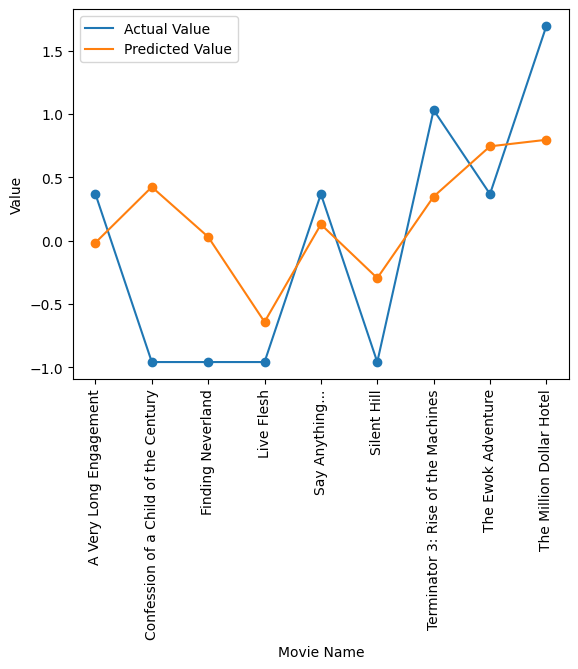

In [ ]:
# create a scatter plot
plt.scatter(predictedTable['movieName'], predictedTable['actualValue'])
plt.scatter(predictedTable['movieName'], predictedTable['predictedValue'])

plt.plot(predictedTable['movieName'], predictedTable['actualValue'], label='Actual Value')
plt.plot(predictedTable['movieName'], predictedTable['predictedValue'], label='Predicted Value')

plt.xticks(rotation=90)
plt.legend()

plt.xlabel('Movie Name')
plt.ylabel('Value')

plt.show()

Finding the Root mean square error between actual and predicted user rating

In [ ]:
def RMSE(predictedTable):
  # sum = 0;
  # RMSE = 0
  # for i in range(0,len(predictedTable.index)):
    # sum = sum + (predictedTable['actualValue'][i] - predictedTable['predictedValue'][i])**2
  # RMSE = sqrt((predictedTable['actualValue']-predictedTable['predictedValue'])/len(predictedTable))
  RMSE = np.sqrt(mean_squared_error(predictedTable['actualValue'], predictedTable['predictedValue']))
  return RMSE
print(RMSE(predictedTable))

0.748104574984295


Finding the Mean absolute error between actual and predicted user rating

In [ ]:
def MAE(predictedTable):
  mae = np.mean(np.abs(predictedTable['actualValue'] - predictedTable['predictedValue']))
  # for i in range(0,len(predictedTable.index)):
  #   sum = sum + (predictedTable['actualValue'][i] - predictedTable['predictedValue'][i])**2

  # RMSE = sqrt(sum/len(predictedTable))
  return mae
print(MAE(predictedTable))

0.6584081951162027


Finding the Precision of a model using actual and predicted user rating

In [ ]:
def Precision(predictedTable):
    # threshold = 4

  # get the indices of movies that are actually recommended (i.e., actual rating >= threshold)
  # Counting True Positives, False Positives, and False Negatives
  tp = fp = fn = 0
  # Refector the value of the expected ratings,
  # TODO...
  treshold = min(predictedTable['actualValue'])*0.5;

  # 
  for i in range(len(predictedTable['actualValue'])):
      if predictedTable['actualValue'][i] >= treshold and predictedTable['predictedValue'][i] >= treshold:
          tp += 1
      elif predictedTable['actualValue'][i] < treshold and predictedTable['predictedValue'][i] >= treshold:
          fp += 1
      elif predictedTable['actualValue'][i] >= treshold and predictedTable['predictedValue'][i] < treshold:
          fn += 1

  # Computing Precision and Recall
  if((tp + fp) != 0 and (tp + fn) != 0):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return {'precision': precision, 'recall':recall}
  else:
    return {'precision': np.NaN, 'recall':np.NaN}
print(Precision(predictedTable))

{'precision': 0.625, 'recall': 1.0}


Finding the all a values of all user and storing in the table

In [ ]:
def RMSECalculater(train_matrix_norm,test_matrix_norm):
  precision_table = pd.DataFrame(columns=["UserId", "RMSE", "MAE", "Precision", "Recall", "Actual", "Predicition"])
  for i in train_matrix.index:
    user_similarity = userSimilarity()
    userContainerDrop(i, user_similarity)
    similar_user = similarUser(user_similarity,i)
    picked_userid_watched = removeUserWatched(train_matrix_norm,i)
    similar_user_movies = removeUserSimilerWatched(train_matrix_norm,similar_user)
    removeWatchedMovie(similar_user_movies,picked_userid_watched)
    ranked_item_score = userRecommendationScore(similar_user_movies,similar_user)
    test_picked_userid_watched = testDataUserWatched(test_matrix_norm,i)
    predictedTable = actualPredictedValue(test_picked_userid_watched,ranked_item_score)
    actual = predictedTable['actualValue'].mean()
    predected = predictedTable['predictedValue'].mean()
    if(len(predictedTable) > 0):
      RMSEValue = RMSE(predictedTable)
      MAEValue = MAE(predictedTable)
      Predection = Precision(predictedTable);
      precision_table = precision_table.append({"UserId": i,"RMSE": RMSEValue, "MAE": MAEValue, "Precision": Predection['precision'], "Recall" : Predection['recall'], "Actual" : actual, "Predicition" : predected},ignore_index=True)
    else:
      precision_table = precision_table.append({"UserId": i, "RMSE": np.NaN, "MAE": np.NaN, "Precision": np.NaN, "Recall" : np.NaN, "Actual" : np.NaN, "Predicition" : np.NaN},ignore_index=True)
  return precision_table
value = RMSECalculater(train_matrix_norm,test_matrix_norm)

Streaming output truncated to the last 5000 lines.
<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0, j], "predictedValue": ranked_item_score['movie_score'][i]}, ignore_index=True)
<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j], "actualValue": test_picked_userid_watched.iloc[0, j], "predictedValue": ranked_item_score['movie_score'][i]}, ignore_index=True)
<ipython-input-34-b0cd9d0c6f09>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictedTable = predictedTable.append({"movieName": col[j]

In [ ]:
value

,UserId,RMSE,MAE,Precision,Recall,Actual,Predicition
0,1.0,0.369176,0.306082,0.500000,1.0,5.181041e-16,-0.088052
1,2.0,1.070603,0.792434,0.812500,1.0,0.000000e+00,-0.074906
2,3.0,0.748105,0.658408,0.625000,1.0,-1.233581e-16,0.168969
3,4.0,0.869288,0.691479,0.945946,1.0,-3.120627e-16,0.007148
4,5.0,1.079200,0.865797,0.916667,1.0,-3.932040e-17,-0.125757
...,...,...,...,...,...,...,...
666,667.0,0.906818,0.675554,0.882353,1.0,3.918434e-17,0.127346
667,668.0,1.097950,0.642562,0.750000,1.0,0.000000e+00,0.514673
668,669.0,0.370425,0.370160,1.000000,1.0,0.000000e+00,-0.370160
669,670.0,0.965909,0.740128,0.714286,1.0,-1.268826e-16,0.184965


Graph of RMSE with differnet users

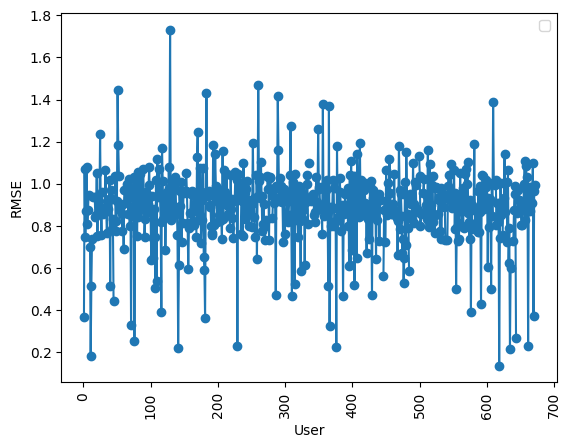

In [ ]:
# create a scatter plot
plt.scatter(value['UserId'], value['RMSE'])

plt.plot(value['UserId'], value['RMSE'])

plt.xticks(rotation=90)
plt.legend()

plt.xlabel('User')
plt.ylabel('RMSE')

plt.show()

Graph of MAE with differnet users

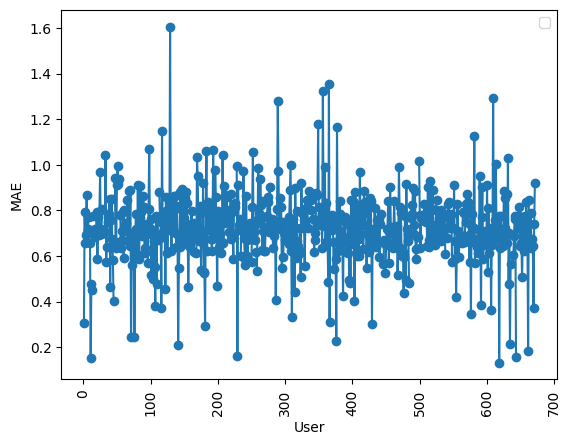

In [ ]:
# create a scatter plot
plt.scatter(value['UserId'], value['MAE'])

plt.plot(value['UserId'], value['MAE'])

plt.xticks(rotation=90)
plt.legend()

plt.xlabel('User')
plt.ylabel('MAE')

plt.show()

Average Precision of an model is given as follow:

In [ ]:
averagePrecision = value['Precision'].mean()

In [ ]:
averagePrecision

0.7771200128182194

Graph of Precision with differnet users

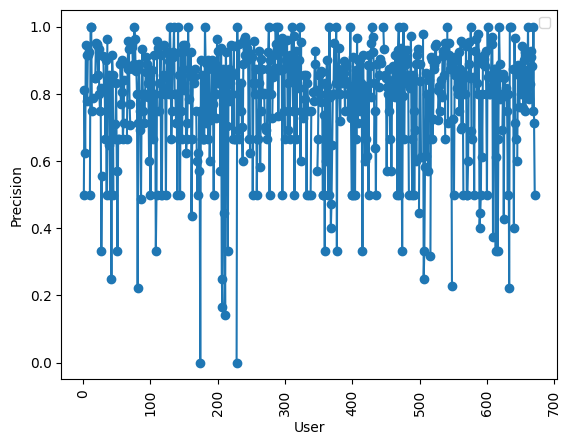

In [ ]:
# create a scatter plot
plt.scatter(value['UserId'], value['Precision'])

plt.plot(value['UserId'], value['Precision'])

plt.xticks(rotation=90)
plt.legend()

plt.xlabel('User')
plt.ylabel('Precision')

plt.show()

Graph os RMSE and MAE to find the average error and number of users having similer relation

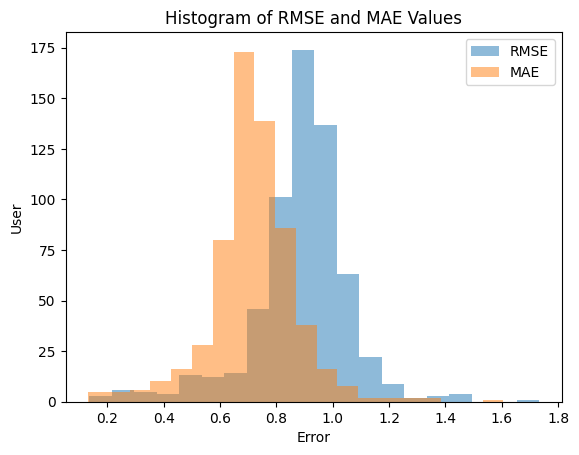

In [ ]:
# Create a histogram of RMSE values
plt.hist(value['RMSE'], bins=20, alpha=0.5, label='RMSE')

# Create a histogram of MAE values
plt.hist(value['MAE'], bins=20, alpha=0.5, label='MAE')

# Add a title and axis labels
plt.title('Histogram of RMSE and MAE Values')
plt.xlabel('Error')
plt.ylabel('User')

# Add a legend and show the plot
plt.legend()
plt.show()


Graph of RMSE & MAE with respect to the User id

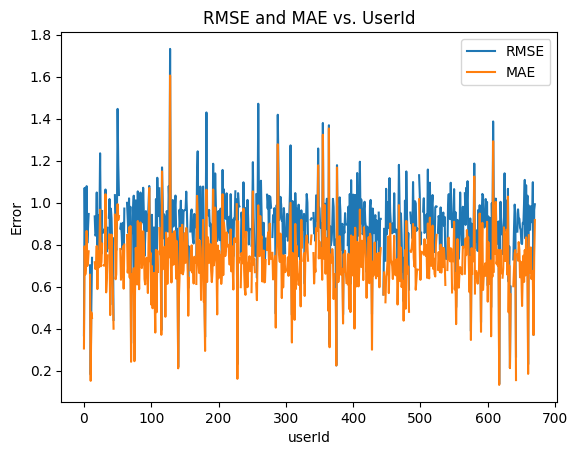

In [ ]:
iterations = range(len(value['UserId']))  # assuming the number of iterations is the same for RMSE and MAE

# plotting RMSE and MAE vs iterations on the same graph
plt.plot(iterations, value['RMSE'], label='RMSE')
plt.plot(iterations, value['MAE'], label='MAE')
# plt.plot(iterations, value['Precision'], label='Precision')

# setting x and y labels and title
plt.xlabel('userId')
plt.ylabel('Error')
plt.title('RMSE and MAE vs. UserId')

# adding legend
plt.legend()

# displaying the plot
plt.show()